In [1]:
#Data set de 3 especies de pinguinos

In [3]:
import seaborn as sns
import pandas as pd

# Cargar dataset
penguins = sns.load_dataset("penguins")

# Mostrar primeras filas
print(penguins.head())

# Ver info general
print(penguins.info())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_

In [7]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [9]:
# Vamos a iniciar con la estadistica descriptiva

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


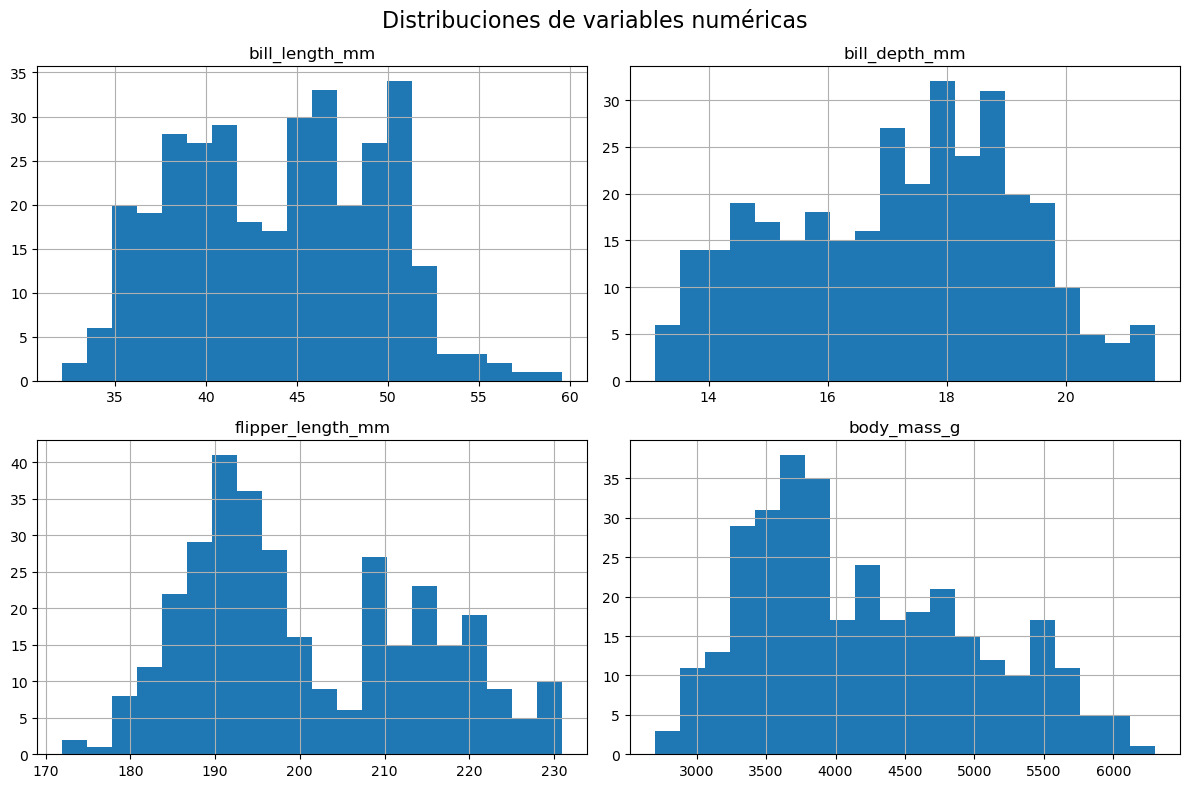

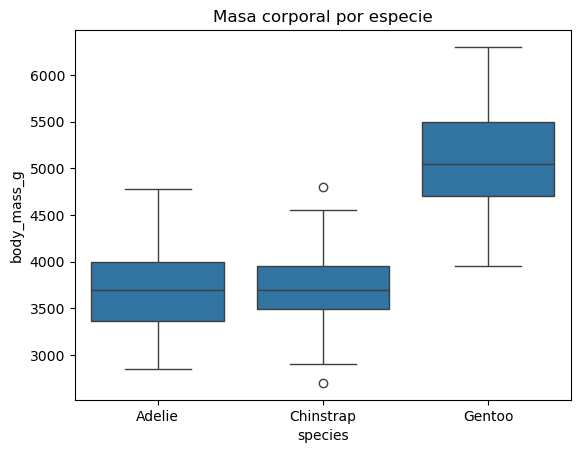

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset
penguins = sns.load_dataset("penguins")

# Eliminar filas con valores faltantes (para simplificar análisis por ahora)
penguins_clean = penguins.dropna()

# Ver estadística descriptiva
print(penguins_clean.describe())

# Ver distribución de cada variable numérica
penguins_clean.hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribuciones de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplot por especie
sns.boxplot(data=penguins_clean, x="species", y="body_mass_g")
plt.title("Masa corporal por especie")
plt.show()


In [17]:
# Ahora hacemos la descripcion de las variables categoricas: sex, island y sp

Distribución por sexo:
sex
Male      168
Female    165
Name: count, dtype: int64

Distribución por isla:
island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

Distribución por especie:
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


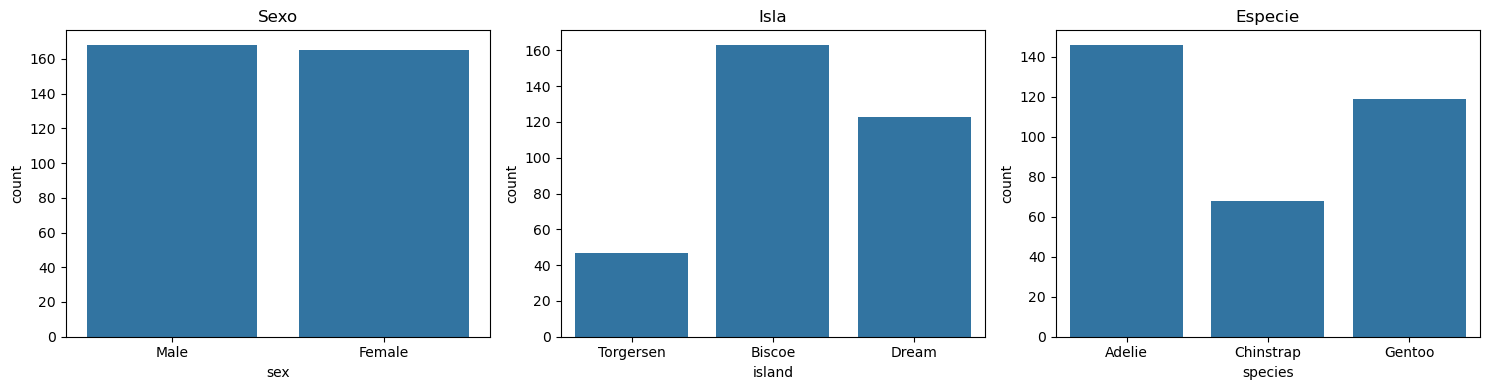

In [15]:
# Distribución de valores categóricos
print("Distribución por sexo:")
print(penguins_clean["sex"].value_counts())
print("\nDistribución por isla:")
print(penguins_clean["island"].value_counts())
print("\nDistribución por especie:")
print(penguins_clean["species"].value_counts())

# Gráficos de barras
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.countplot(data=penguins_clean, x="sex", ax=axes[0])
axes[0].set_title("Sexo")

sns.countplot(data=penguins_clean, x="island", ax=axes[1])
axes[1].set_title("Isla")

sns.countplot(data=penguins_clean, x="species", ax=axes[2])
axes[2].set_title("Especie")

plt.tight_layout()
plt.show()


In [19]:
# ya tenemos toda la parte descriptiva, ahora voy a elegir una variable continua (body mass) y una categoriza (sexo)

In [21]:
#FLUJO: VER NORMALIDAD DE BODY MASS POR GRUPO (F o M)
#VERIFICAR HOMOGENEIDAD DE VARIANZAS
#APLICAR PRUEBAS

In [23]:
#PASO 1, shapiro que es buena para muestras chicas

In [25]:
from scipy.stats import shapiro

# Separar por sexo
male_mass = penguins_clean[penguins_clean["sex"] == "Male"]["body_mass_g"]
female_mass = penguins_clean[penguins_clean["sex"] == "Female"]["body_mass_g"]

# Shapiro-Wilk para cada grupo
shapiro_male = shapiro(male_mass)
shapiro_female = shapiro(female_mass)

print("Shapiro-Wilk para Males:", shapiro_male)
print("Shapiro-Wilk para Females:", shapiro_female)


Shapiro-Wilk para Males: ShapiroResult(statistic=0.9250434333591544, pvalue=1.2268143351220743e-07)
Shapiro-Wilk para Females: ShapiroResult(statistic=0.9193140238600224, pvalue=6.155316017174459e-08)


In [33]:
#interpretacion: si p < 0.05 la distribucion es normal. resultados NO normal ambos grupos

In [29]:
#PASO 2, Homogeneidad de varianzas con Levene

In [31]:
from scipy.stats import levene

levene_test = levene(male_mass, female_mass)
print("Levene test:", levene_test)


Levene test: LeveneResult(statistic=6.058617438712248, pvalue=0.014348206700435243)


In [35]:
#Interpretacion p<0.05 varianzas iguales: en este caso las varianzas son distintas
#No puedo usar prueba parametrica, tengo que usar Mann-Withney U

In [37]:
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(male_mass, female_mass, alternative="two-sided")
print("Mann-Whitney U test:")
print("Estadístico U:", u_stat)
print("p-valor:", p_val)


Mann-Whitney U test:
Estadístico U: 20845.5
p-valor: 1.8133343032461053e-15


In [39]:
#Interpretacion hay una diferencia muy significativa en peso entre machos y hembras
#no hace falta hacer prueba a posterior porque son solo 2 grupos

In [41]:
#vamos a visualizarlo

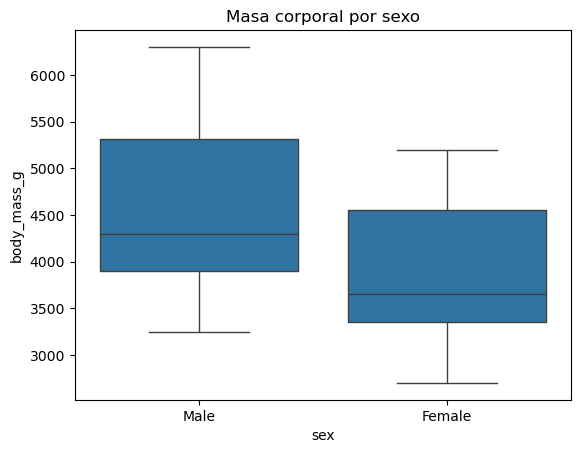

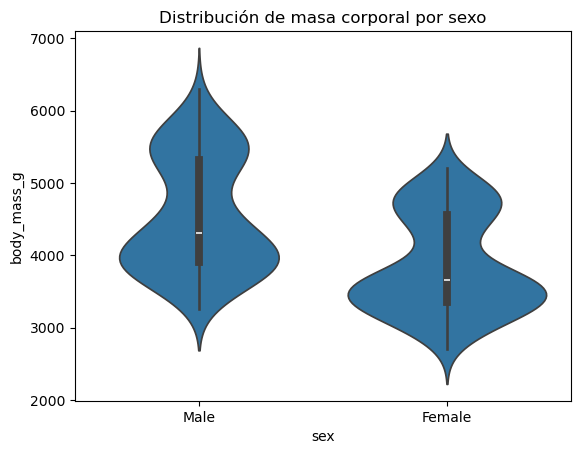

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=penguins_clean, x="sex", y="body_mass_g")
plt.title("Masa corporal por sexo")
plt.show()

# O violinplot, para ver densidades
sns.violinplot(data=penguins_clean, x="sex", y="body_mass_g")
plt.title("Distribución de masa corporal por sexo")
plt.show()


Ahora cambio la variable y comparo body mass con especie. tengo 3 grupos

In [46]:
#Paso 1 normalidad por especie

In [48]:
from scipy.stats import shapiro

for especie in penguins_clean["species"].unique():
    grupo = penguins_clean[penguins_clean["species"] == especie]["body_mass_g"]
    stat, p = shapiro(grupo)
    print(f"{especie}: p-valor = {p:.5f}")


Adelie: p-valor = 0.04232
Chinstrap: p-valor = 0.56051
Gentoo: p-valor = 0.26052


In [52]:
#interpretacion: Adeline es NO normal, Chinstrap y Gentoo si

In [54]:
from scipy.stats import levene

adelie = penguins_clean[penguins_clean["species"] == "Adelie"]["body_mass_g"]
gentoo = penguins_clean[penguins_clean["species"] == "Gentoo"]["body_mass_g"]
chinstrap = penguins_clean[penguins_clean["species"] == "Chinstrap"]["body_mass_g"]

levene_test = levene(adelie, gentoo, chinstrap)
print("Levene test:", levene_test)


Levene test: LeveneResult(statistic=5.134899089832661, pvalue=0.006367053545909322)


In [56]:
#interpretacion no hay homogeneidad de varianzas
#No se cumplen los supuestos no puedo hacer pruebas parametricas  voy con KRuskall wallis

In [58]:
from scipy.stats import kruskal

kruskal_test = kruskal(adelie, gentoo, chinstrap)
print("Kruskal-Wallis test:", kruskal_test)


Kruskal-Wallis test: KruskalResult(statistic=212.08513173193893, pvalue=8.836876744281845e-47)


In [60]:
#interpretacion: hay diferencias significativas y en la posteriori uso Dunn

In [62]:
import scikit_posthocs as sp

# Crear el dataframe para la prueba post-hoc
posthoc = sp.posthoc_dunn(penguins_clean, val_col="body_mass_g", group_col="species", p_adjust="bonferroni")
print(posthoc)


                 Adelie     Chinstrap        Gentoo
Adelie     1.000000e+00  1.000000e+00  1.076456e-41
Chinstrap  1.000000e+00  1.000000e+00  2.220583e-26
Gentoo     1.076456e-41  2.220583e-26  1.000000e+00


In [64]:
#interpretacion Adelie vs Chinstrap: p = 1.00 → No hay diferencia significativa.
#Adelie vs Gentoo: p ≈ 1.08e-41 → Sí hay diferencia significativa.
#Chinstrap vs Gentoo: p ≈ 2.22e-26 → Sí hay diferencia significativa

Ahora voy a hacer comparacion entre variables categoricas como isla y sexo con Chi cuadrado
FLujo: 1-Crear una tabla de contingencia.
2-Aplicar la prueba de chi-cuadrado.
3-Interpretar el p-valor.


In [67]:
# Crear tabla de contingencia
contingency_table = pd.crosstab(penguins_clean['sex'], penguins_clean['island'])

# Mostrar tabla
print(contingency_table)


island  Biscoe  Dream  Torgersen
sex                             
Female      80     61         24
Male        83     62         23


In [69]:
from scipy.stats import chi2_contingency

# Aplicar prueba de chi-cuadrado
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Estadístico chi-cuadrado: {chi2_stat}")
print(f"p-valor: {p_val}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)


Estadístico chi-cuadrado: 0.05759904881286206
p-valor: 0.971611229281065
Grados de libertad: 2
Frecuencias esperadas:
[[80.76576577 60.94594595 23.28828829]
 [82.23423423 62.05405405 23.71171171]]


In [71]:
#interpretacion: Dado que el p-valor > 0.05, no hay evidencia suficiente para rechazar la hipótesis nula.
#Esto significa que no hay una relación significativa entre las variables sexo e isla en este caso. 
#Es decir, la distribución del sexo parece ser independiente de la isla.

Ahora voy a seguir con una matriz de correlacion de mis variables numericas
Debo verificar la normalidad si quiero usar Pearson, pero en este caso como ya vi que no tengo normalidad en algunas voy
directamente a usar Spearman (no tengo nada que hacer solo saltear este paso)
Hago la matriz y la grafico


In [74]:
# Seleccionamos las variables numéricas
num_cols = penguins_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Calcular la correlación de Pearson
correlation_matrix = num_cols.corr()

# Calcular la correlación de Spearman (si prefieres no asumir normalidad)
# correlation_matrix = num_cols.corr(method='spearman')

print(correlation_matrix)


                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


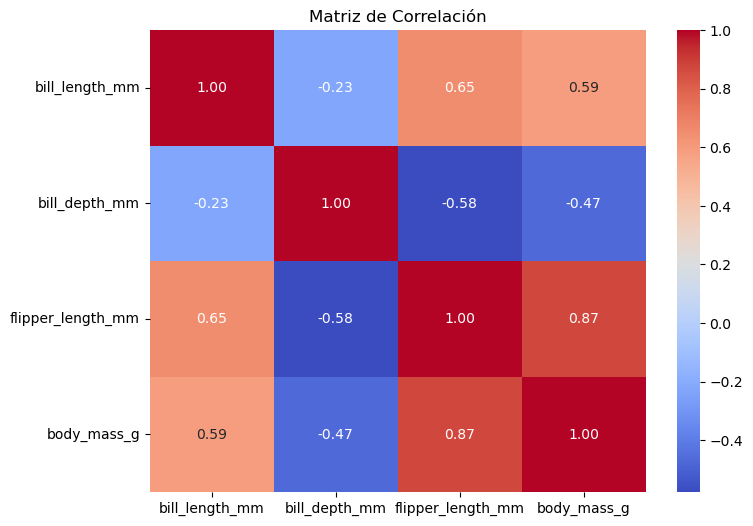

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de Correlación")
plt.show()


In [78]:
#Interpretacion de la matriz
#bill_length_mm vs body_mass_g: 0.59 → correlación moderada positiva. A mayor longitud del pico, mayor masa corporal, lo cual tiene sentido, ya que las especies más grandes tienden a tener picos más largos y mayor masa.

#bill_depth_mm vs body_mass_g:-0.47 → correlación moderada negativa. A mayor profundidad del pico, menor masa corporal. Esto podría indicar que algunas especies con un pico más profundo tienden a ser más ligeras.

#flipper_length_mm vs body_mass_g:0.87 → correlación fuerte positiva. La longitud de las aletas tiene una relación muy fuerte con la masa corporal, lo cual es lógico, ya que los pingüinos más grandes suelen tener aletas más largas y, por ende, mayor peso.

#flipper_length_mm vs bill_length_mm:0.65 → correlación moderada positiva. Los pingüinos con aletas más largas también tienden a tener picos más largos.

#bill_depth_mm vs flipper_length_mm:-0.58 → correlación moderada negativa. Las especies con picos más profundos tienen, en general, aletas más cortas.

podria seguir explorando otras correlaciones  
Por ejemplo, ¿hay una relación más fuerte entre longitud de las aletas y masa corporal para una especie en particular?

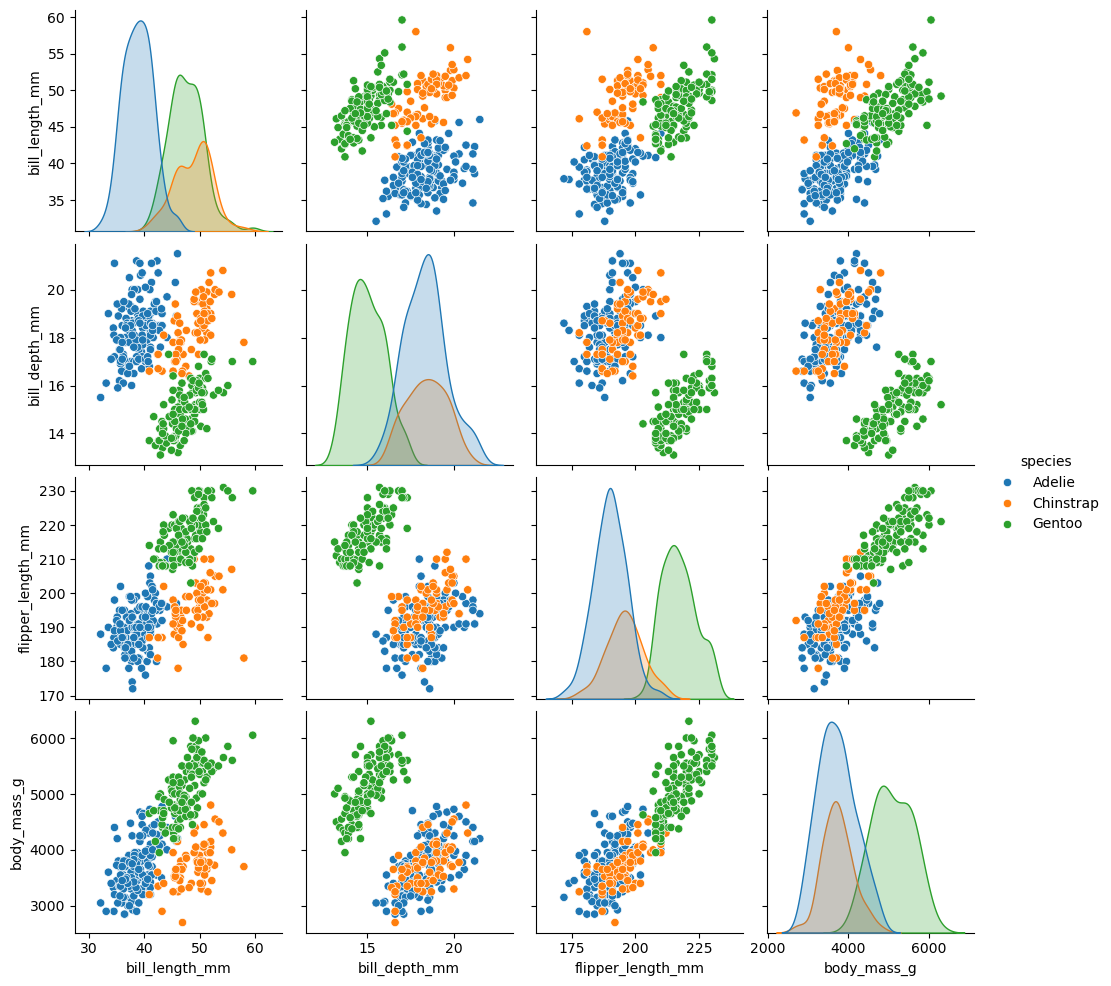

In [81]:
sns.pairplot(penguins_clean, hue="species", vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"])
plt.show()


In [83]:
#interpretacion: ver los graficos de la diagonal por sp para cada caracteristica

voy a seguir explorando la distribucion de variables, Cómo se distribuyen las variables como masa corporal o longitud de las aletas dentro de cada especie? Un boxplot o histograma me podría dar más claridad

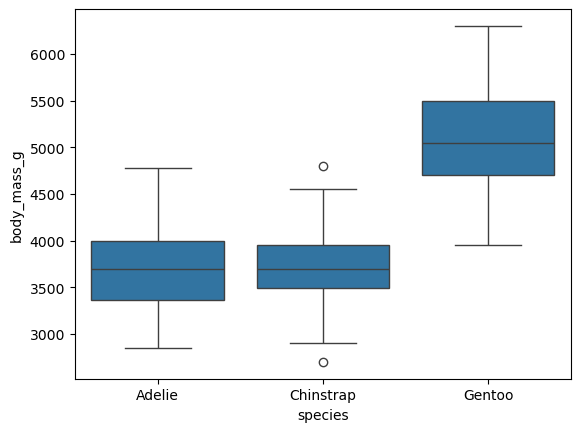

In [86]:
sns.boxplot(x="species", y="body_mass_g", data=penguins_clean)
plt.show()


Ahora todo lo que vendria seria hilar mas fino: como buscar outliers, segmentar o clustering
Vamos a empezar buscando Outliers en masa corporal

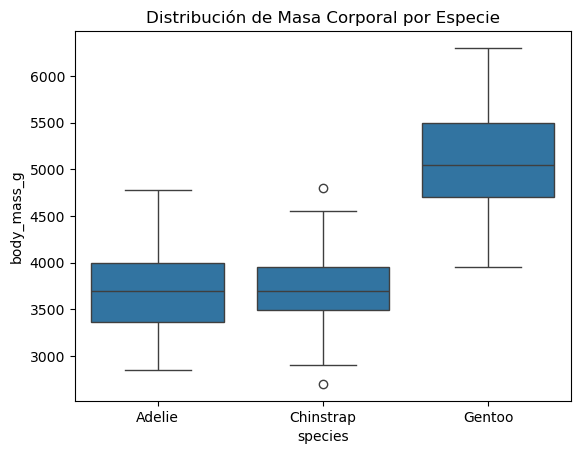

Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


In [89]:
# Boxplot para detectar outliers
sns.boxplot(x="species", y="body_mass_g", data=penguins_clean)
plt.title("Distribución de Masa Corporal por Especie")
plt.show()

# Usar el rango intercuartílico (IQR) para detectar outliers
Q1 = penguins_clean['body_mass_g'].quantile(0.25)
Q3 = penguins_clean['body_mass_g'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = penguins_clean[(penguins_clean['body_mass_g'] < lower_limit) | (penguins_clean['body_mass_g'] > upper_limit)]
print(outliers)


In [91]:
#Interpretacion: no se encontraron Outliers (empty dataframe)

In [93]:
#Vamos seguir con la opcion de segmentacion con 3 opciones:
#Por especie: Ver cómo varían las características dentro de cada especie.
#Por isla: Segmentar según las islas, que podrían tener diferentes condiciones ambientales.
#Combinando ambas: Analizar la masa corporal u otras características específicas de cada especie dentro de cada isla.


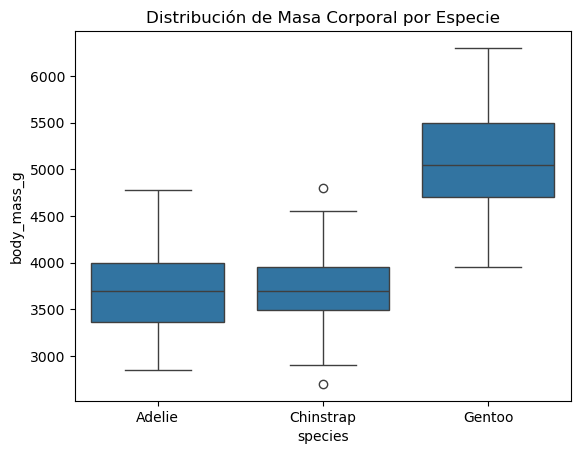

In [95]:
# Boxplot para masa corporal por especie
sns.boxplot(x="species", y="body_mass_g", data=penguins_clean)
plt.title("Distribución de Masa Corporal por Especie")
plt.show()


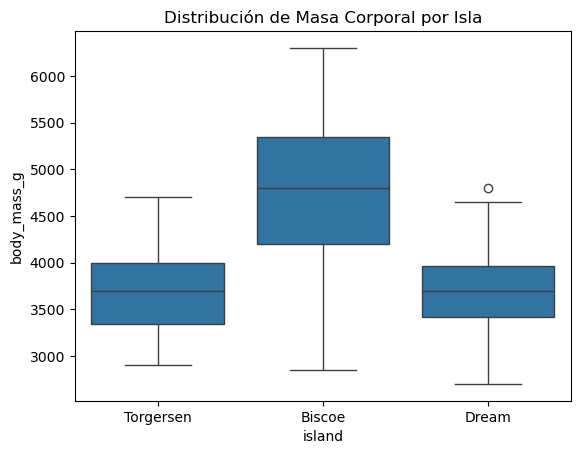

In [97]:
# Boxplot para masa corporal por isla
sns.boxplot(x="island", y="body_mass_g", data=penguins_clean)
plt.title("Distribución de Masa Corporal por Isla")
plt.show()


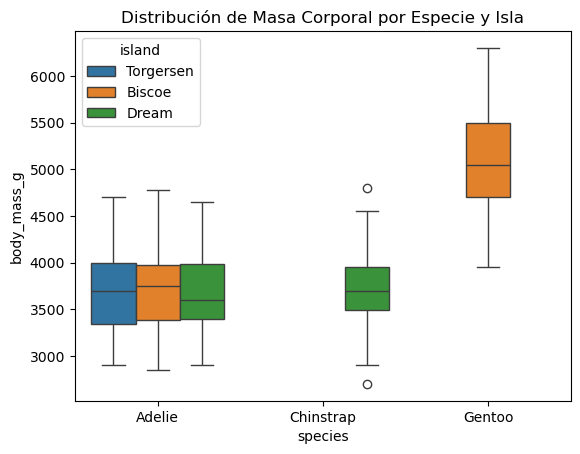

In [99]:
# Boxplot para masa corporal por especie dentro de cada isla
sns.boxplot(x="species", y="body_mass_g", hue="island", data=penguins_clean)
plt.title("Distribución de Masa Corporal por Especie y Isla")
plt.show()


Por ultimo, ahora podria agrupar, por ej Adelie y Chinstrap
Pero para estar segura de esto lo mejor es hacer un K-Means con este flujo:
Preparar los datos: Seleccionaremos las columnas relevantes para el clustering (como masa corporal, longitud del pico, etc.).

Escalar los datos: Es importante escalar los datos antes de aplicar K-means, ya que las variables con diferentes unidades de medida (por ejemplo, masa corporal en gramos y longitud del pico en milímetros) pueden afectar el algoritmo.

Aplicar K-means: Elegiremos un número de grupos (k), que puede ser ajustado según el análisis.

Visualizar los resultados: Ver cómo los datos se agrupan y si Adelie y Chinstrap terminan en el mismo grupo.

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las variables relevantes para el clustering
X = penguins_clean[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]

# Escalar los datos (esto es importante para K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verifica las primeras filas del conjunto de datos escalados
print(X_scaled[:5])


[[-0.56847478 -0.89604189  0.7807321  -1.42675157]
 [-0.50628618 -0.82278787  0.11958397 -1.06947358]
 [-1.1903608  -0.67627982  0.42472926 -0.42637319]
 [-0.94160639 -1.33556603  1.0858774  -0.56928439]
 [-0.69285199 -0.85941488  1.74702554 -0.78365118]]


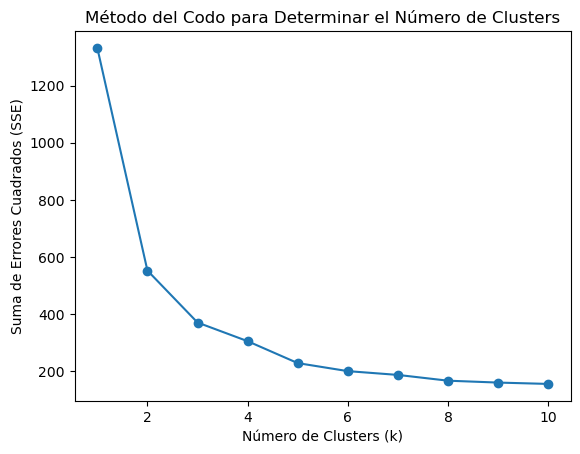

In [104]:
# Método del codo para determinar el número de clusters óptimo
sse = []
k_range = range(1, 11)  # Probar con k entre 1 y 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(k_range, sse, marker='o')
plt.title("Método del Codo para Determinar el Número de Clusters")
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de Errores Cuadrados (SSE)')
plt.show()


In [106]:
#interpretacion: El punto de inflexión (donde la caída en SSE disminuye) te indicará el valor óptimo de k.

In [110]:
penguins_clean.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)


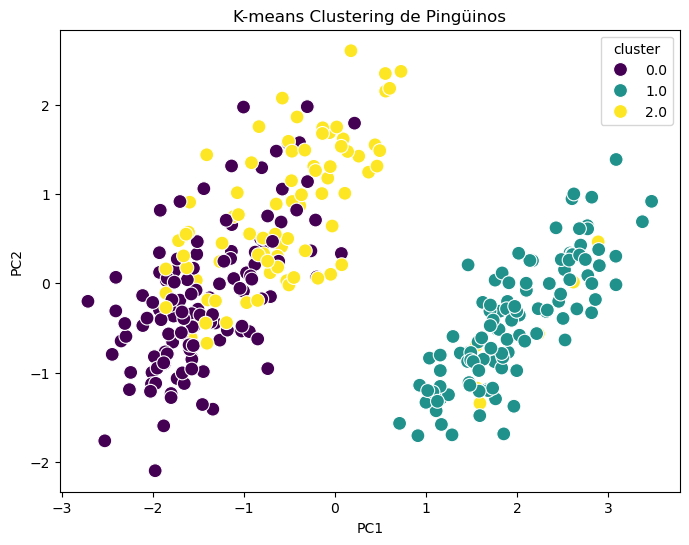

In [112]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad con PCA (2 componentes principales)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales y los clusters
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = penguins_clean['cluster']

# Visualizar los clusters en un gráfico 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=100)
plt.title("K-means Clustering de Pingüinos")
plt.show()


In [114]:
#Para verificar que hay en cada cluster

In [116]:
# Ver las especies por cluster
cluster_species = penguins_clean.groupby('cluster')['species'].value_counts()
print(cluster_species)


cluster  species  
0        Adelie       124
         Chinstrap      5
1        Gentoo       119
2        Chinstrap     63
         Adelie        22
Name: count, dtype: int64


In [118]:
#interpretacion, esto demuestra que puedo agrupar  Adelie y Chinstrap para usarlo como 1 grupo

Ahora voy a agrupar Adelie y Chinestrap para convertirlo en 1 solo grupo, agrego 1 columna

In [124]:
# Crear una nueva columna
penguins_clean.loc[:, 'new_group'] = penguins_clean['species'].apply(
    lambda x: 'Adelie_Chinstrap' if x in ['Adelie', 'Chinstrap'] else 'Gentoo'
)

# Verifica las primeras filas para asegurarte que la columna fue creada correctamente
print(penguins_clean[['species', 'new_group']].head())


  species         new_group
0  Adelie  Adelie_Chinstrap
1  Adelie  Adelie_Chinstrap
2  Adelie  Adelie_Chinstrap
4  Adelie  Adelie_Chinstrap
5  Adelie  Adelie_Chinstrap


In [126]:
# Separar los grupos en masa corporal
adelie_chinstrap_group = penguins_clean[penguins_clean['new_group'] == 'Adelie_Chinstrap']['body_mass_g']
gentoo_group = penguins_clean[penguins_clean['new_group'] == 'Gentoo']['body_mass_g']

# Realizar la prueba de Mann-Whitney U
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(adelie_chinstrap_group, gentoo_group)
print(f"Estadístico U: {stat}, p-valor: {p_value}")


Estadístico U: 477.5, p-valor: 5.147329977958863e-48


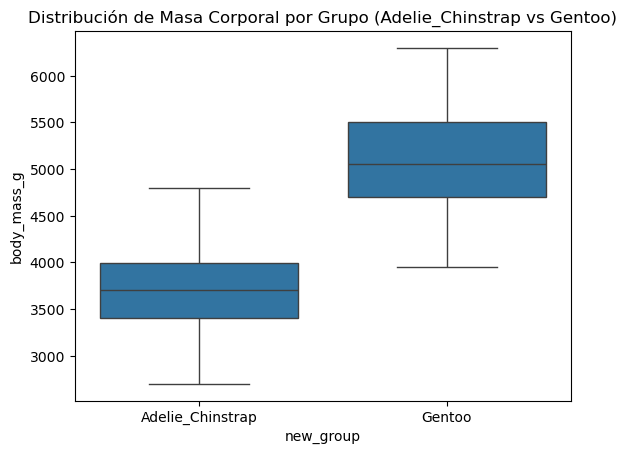

In [128]:
# Boxplot de masa corporal por el nuevo grupo
sns.boxplot(x="new_group", y="body_mass_g", data=penguins_clean)
plt.title("Distribución de Masa Corporal por Grupo (Adelie_Chinstrap vs Gentoo)")
plt.show()


In [130]:
#Interpretacion: hay diferencias significativas entre el nuevo grupo y Gentoo, lo cual refuerza la idea de que si podian agruparse

AQUI ES DONDE VOY A ENTRAR A ML
QUE MODELO PODRIA USAR PARA PREDECIR QUE CARACTERISTICA?
POR EJEMPLO, Predecir la especie de un pingüino basado en características como masa corporal, longitud de pico, etc.
O Clasificar por isla o sexo a partir de las características.

FLUJO: 1)DEFINIR MI OBJETIVO
2)PREPARAR LOS DATOS
3)SELECCIONAR UN MODELO
4)ENTRENAR EL MODELO
5)EVALUAR EL MODELO

In [138]:
#VOY A ENTRENAR UN MODELO DE RANDOM FOREST CON ESTOS DATOS

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Variables predictoras y objetivo
X = penguins_clean[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'sex', 'island']].copy()
y = penguins_clean['species']

# Codificar variable objetivo
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# Codificar variables categóricas con .loc para evitar SettingWithCopyWarning
label_encoder_sex = LabelEncoder()
label_encoder_island = LabelEncoder()

X.loc[:, 'sex'] = label_encoder_sex.fit_transform(X['sex'])
X.loc[:, 'island'] = label_encoder_island.fit_transform(X['island'])

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [172]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)


In [174]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [176]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Mostrar nombres correctos de las clases en el reporte
class_names = label_encoder_y.inverse_transform(sorted(set(y_test)))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [180]:
#Interpretacion: el modelo se comporta muy bien pero cuidado, como es un dataset pequeño podria estar overfitting
#esta midiendo datos de entrenamiento

In [196]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Cargar dataset (ajusta si usas otro nombre)
df = penguins.dropna()

# Separar variables predictoras y objetivo
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'island']].copy()
y = df['species']

# Guardar los LabelEncoders por separado
label_encoder_sex = LabelEncoder()
label_encoder_island = LabelEncoder()
label_encoder_y = LabelEncoder()

# Codificar sex e island
X['sex'] = label_encoder_sex.fit_transform(X['sex'])
X['island'] = label_encoder_island.fit_transform(X['island'])

# Codificar y (especie)
y = label_encoder_y.fit_transform(y)


In [200]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [204]:
# Nuevo pingüino para predecir
nuevo_pingüino = pd.DataFrame({
    'bill_length_mm': [46.5],
    'bill_depth_mm': [15.0],
    'flipper_length_mm': [210],
    'body_mass_g': [4200],
    'sex': ['Male'],
    'island': ['Biscoe']
})

# Codificar sex e island usando los LabelEncoders entrenados
nuevo_pingüino['sex'] = label_encoder_sex.transform(nuevo_pingüino['sex'])
nuevo_pingüino['island'] = label_encoder_island.transform(nuevo_pingüino['island'])

# Asegurarse que las columnas estén en el mismo orden que X
nuevo_pingüino = nuevo_pingüino[X.columns]

# Predicción
prediccion = model.predict(nuevo_pingüino)
especie_predicha = label_encoder_y.inverse_transform(prediccion)

print("🔮 Especie predicha:", especie_predicha[0])


🔮 Especie predicha: Gentoo


In [206]:
#interpretacion, el modelo esta funcionando y con esos datos me dice que la sp es Gentoo
#vamos a probar con otros nuevos datos

In [212]:
print(label_encoder_X.classes_)


['Biscoe']


In [216]:
from sklearn.preprocessing import LabelEncoder

# Crear un LabelEncoder para 'sex' y otro para 'island'
label_encoder_sex = LabelEncoder()
label_encoder_island = LabelEncoder()

# Ajustamos los encoders con los datos del conjunto original
label_encoder_sex.fit(df['sex'])
label_encoder_island.fit(df['island'])

# Nuevos datos para predecir
nuevos_datos = pd.DataFrame({
    'bill_length_mm': [44.5, 42.1, 50.0],
    'bill_depth_mm': [13.5, 14.0, 15.5],
    'flipper_length_mm': [200.0, 210.0, 220.0],
    'body_mass_g': [3500, 4000, 5000],
    'sex': ['Male', 'Female', 'Male'],  # Asegúrate de que coincidan con los valores del dataset original
    'island': ['Dream', 'Torgersen', 'Biscoe']
})

# Transformar 'sex' y 'island' por separado usando sus respectivos LabelEncoders
nuevos_datos['sex'] = label_encoder_sex.transform(nuevos_datos['sex'])  # Transformar 'sex'
nuevos_datos['island'] = label_encoder_island.transform(nuevos_datos['island'])  # Transformar 'island'

# Asegúrate de que las columnas estén en el mismo orden que en el modelo entrenado
nuevos_datos = nuevos_datos[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'island']]

# Hacer la predicción con el modelo
predicciones = model.predict(nuevos_datos)

# Destransformar las predicciones
especies_predichas = label_encoder_y.inverse_transform(predicciones)

# Imprimir las predicciones
for i, especie in enumerate(especies_predichas):
    print(f"Predicción para el pingüino {i+1}: {especie}")


Predicción para el pingüino 1: Chinstrap
Predicción para el pingüino 2: Gentoo
Predicción para el pingüino 3: Gentoo


AHORA VOY A PROBAR OTROS MODELOS, PARA COMPARAR CUAL SE ADAPTA MEJOR A MI PROBLEMA
VOY A EMPEZAR POR REGRESION LOGISTICA Y SEGUIR CON VECINOS MAS CERCANOS

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Definir el modelo
log_reg_model = LogisticRegression(max_iter=200)

# Entrenar el modelo
log_reg_model.fit(X_train, y_train)

# Predecir
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluar
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy_log_reg:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=label_encoder_y.classes_))


Accuracy: 0.9900
Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        48
   Chinstrap       0.95      1.00      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [222]:
#EL WARNING DICE QUE DEBO AUMENTAR EL NUMERO DE ITERACIONES PARA ESO:

In [224]:
log_reg_model = LogisticRegression(max_iter=500)  # Aumenta max_iter a 500 o más

log_reg_model.fit(X_train, y_train)

# Predecir
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluar
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy_log_reg:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=label_encoder_y.classes_))


Accuracy: 0.9900
Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        48
   Chinstrap       0.95      1.00      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [226]:
from sklearn.neighbors import KNeighborsClassifier

# Definir el modelo
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Predecir
y_pred_knn = knn_model.predict(X_test)

# Evaluar
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder_y.classes_))


Accuracy: 0.7900
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.79      0.79      0.79        48
   Chinstrap       0.50      0.44      0.47        18
      Gentoo       0.92      0.97      0.94        34

    accuracy                           0.79       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.78      0.79      0.79       100



#INTERPRETACION: LA REGRESION LOGISTRICA FUNCIONA MUY BIEN Y VECINOS MAS CERCANOS MAS O MENOS.
#VOY A SEGUIR CON SUPPORTED MACHINE VECTORS (SMV)

In [229]:
from sklearn.svm import SVC

# Definir el modelo
svm_model = SVC()

# Entrenar el modelo
svm_model.fit(X_train, y_train)

# Predecir
y_pred_svm = svm_model.predict(X_test)

# Evaluar
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder_y.classes_))


Accuracy: 0.7600
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.70      0.90      0.79        48
   Chinstrap       0.00      0.00      0.00        18
      Gentoo       0.85      0.97      0.90        34

    accuracy                           0.76       100
   macro avg       0.52      0.62      0.56       100
weighted avg       0.63      0.76      0.69       100



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#INTERPRETACION: HABRIA QUE CORREGIR ALGUNOS PARAMETROS
#VAMOS A SEGUIR CON GRADIENT BOOSTING

In [232]:
from sklearn.ensemble import GradientBoostingClassifier

# Definir el modelo
gb_model = GradientBoostingClassifier()

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Predecir
y_pred_gb = gb_model.predict(X_test)

# Evaluar
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy_gb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb, target_names=label_encoder_y.classes_))


Accuracy: 0.9800
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        48
   Chinstrap       0.94      0.94      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100



In [234]:
#INTERPRETACION FUNCIONA MUY BIEN, SI QUISIERA SEGUIR POR AQUI PODRIA VER HIPERPARAMETROS
#VOY AL ULTIMO MODELO QUE SERIA XGBOOST

In [236]:
import xgboost as xgb

# Definir el modelo
xgb_model = xgb.XGBClassifier()

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predecir
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder_y.classes_))


Accuracy: 0.9800
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      0.97      0.99        34

    accuracy                           0.98       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100



In [238]:
#INTERPRETACION: ESTE ULTIMO MODELO TAMBIEN FUNCIONA MUY BIEN
#Ambos modelos son sólidos, pero XGBoost tiene una ligera ventaja en precisión para Chinstrap y Adelie, mientras que Gradient Boosting tuvo recall perfecto para Gentoo.

In [ ]:
#PORDIA SEGUIR CON LA OPTIMIZACION DE HIPERPARAMETROS PARA MEJORAR AUN MAS LOS MODELOS DE GRADIENTE
#O PODRIA HACER UN ENSABLE DE LOS MEJORES MODELOS